In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.9MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=bd97a2aa94a7979b0855fe23abbe68241472efceab6c74de4a2648264fbe5ca5
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.6MB/s 
     |████████████████████████████████| 983kB 2.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=09e27c4d543a9a3790fddf533bf00c303588952e2e5ca76219f8acf631729aab
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [8]:
#Importing Various twitter data

df_com = pd.read_json('pretty_gs_tweets_feedback.json')

df_feed = pd.read_json('pretty_ml_tweets_feedback.json')

df_req = pd.read_json('pretty_ms_tweets_feedback.json')

df_req1 = pd.read_json('pretty_jp_tweets_feedback.json')


In [9]:
df = pd.concat([df_com,df_feed,df_req, df_req1])

In [10]:
#Sentiment Analysis
#Vader Sentiment

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [13]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [14]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [15]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

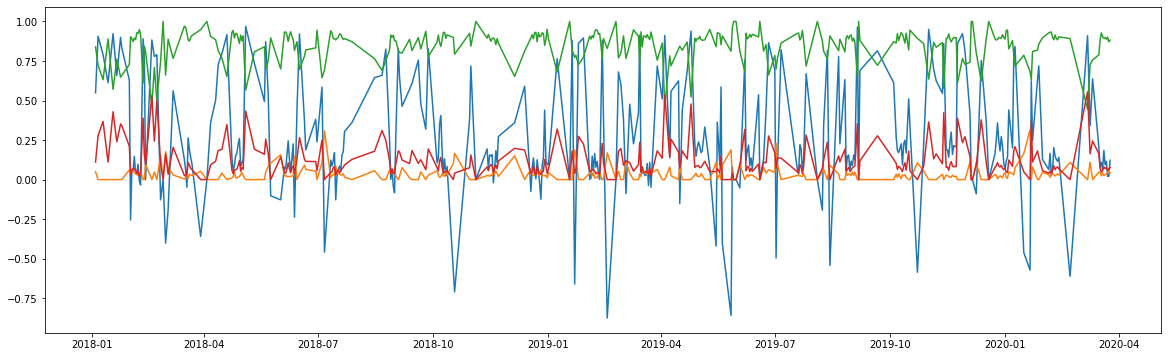

In [16]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [17]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

"Choosing a logo for our coming YouTube channel & website about finding joy with the daily 'holidays'. We have our favorites, but I'm interested in feedback. What do you think?\nhttps://www.freelancer.com/contest/poll-MTM5OTI4MDox\xa0… https://www.freelancer.com/contest/poll-MTM5OTI4MDox\xa0…"

In [18]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Een aantal grote banken zijn sinds kort ook over op een vorm van continue feedback voor hun medewerkers. JPMorgan, Goldman Sachs en Morgan Stanley zien ook het nut van vernieuwing in HR https://buff.ly/2GN29Jj\xa0pic.twitter.com/f9N5C8wfpU'

Text(0, 0.5, 'Sentiment')

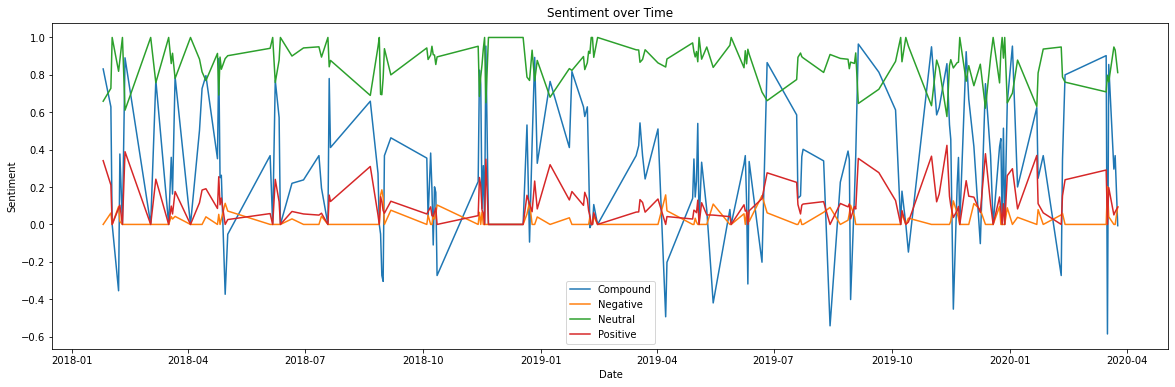

In [19]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

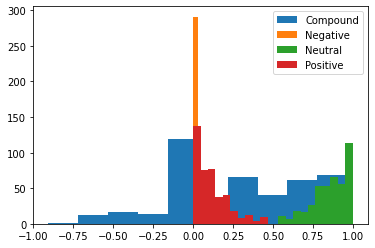

In [20]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

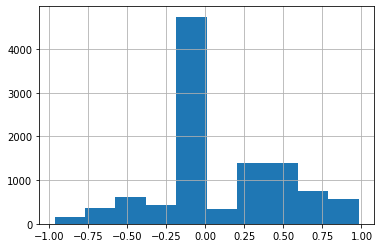

In [21]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [22]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.757,0.243,0.8248
1,0.744,0.256,0.8248
2,0.822,0.178,0.7430
3,0.707,0.181,0.5464
4,0.872,0.128,0.3612
...,...,...,...
235,0.816,0.184,0.7269
236,0.926,0.074,0.2481
237,0.842,0.158,0.7579
238,0.906,0.094,0.3612


In [23]:
#Importing Various twitter data

df_com = pd.read_json('pretty_gs_tweets_feedback.json')

df_feed = pd.read_json('pretty_ml_tweets_feedback.json')

df_req = pd.read_json('pretty_ms_tweets_feedback.json')

df_req1 = pd.read_json('pretty_jp_tweets_feedback.json')


In [24]:
df = pd.concat([df_com,df_feed,df_req, df_req1])

In [25]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 16.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=c96c0e899c5d40541b7d4dddd85e088d3aac12092795a868e0852bca15c9ba81
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=7bd453790e052b2dcbb50820955d6688b507d768cec10b777f9e20dff766c2c0
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(10769, 2123)


In [28]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [29]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [30]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [31]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,0,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:48:44,2018-08-24 20:48:44,1033093772958216192,/Jacob_D_Goldman/status/1033093772958216193,222580216,Jacob D. Goldman,,0.000,0.757,0.243,0.8248
1,False,[],[],True,False,0,[https://www.freelancer.com/contest/poll-MTM5O...,,1,[],0,Jacob_D_Goldman,Choosing a logo for our coming YouTube channel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 20:47:32,2018-08-24 20:47:32,1033093472369033216,/Jacob_D_Goldman/status/1033093472369033216,222580216,Jacob D. Goldman,,0.000,0.744,0.256,0.8248
2,True,[],[https://pbs.twimg.com/media/DkrQdAIUUAEnhoc.j...,True,True,10,[],1029856578592235522,3,"[{'screen_name': 'HARD_HODL', 'user_id': '1010...",2,haydentiff,A Twitter survey suddenly appeared before my e...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 22:57:25,2018-08-15 22:57:25,1029864667160760320,/haydentiff/status/1029864667160760320,2680350607,Tiffany Hayden🧢,,0.000,0.822,0.178,0.7430
3,False,[],[],True,True,2,[],1029272758214057984,1,"[{'screen_name': 'AkamatsuJjh', 'user_id': '46...",0,DannyManus,But people DO know things! That Goldman quote ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-15 00:59:05,2018-08-15 00:59:05,1029532900666953728,/DannyManus/status/1029532900666953728,48051407,Danny Manus,,0.112,0.707,0.181,0.5464
4,False,[],[],False,False,1,[],,0,[],0,simonsmithy,Feedback from recruiter... Candidate said my i...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-07-28 08:23:16,2018-07-28 08:23:16,1023121700236537856,/simonsmithy/status/1023121700236537856,66178610,Simon Smith,,0.000,0.872,0.128,0.3612


In [32]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.152126  0.040314       1        1  16.414290
0      0.134881  0.041735       2        1  13.409015
6     -0.348117 -0.055553       3        1  13.072628
9      0.126745  0.009425       4        1  10.927884
8      0.161460 -0.011924       5        1  10.296417
2     -0.261982  0.048992       6        1   8.669317
3      0.124595 -0.138040       7        1   7.607345
4     -0.185383 -0.048400       8        1   6.828025
7      0.088291 -0.125409       9        1   6.528813
5      0.007384  0.238858      10        1   6.246266, topic_info=          Term        Freq       Total Category  logprob  loglift
902  surprised  130.000000  130.000000  Default  30.0000  30.0000
772     result  129.000000  129.000000  Default  29.0000  29.0000
158    changed  130.000000  130.000000  Default  28.0000  28.0000
743     rating  131.000000  131.000000  Default  27.0000  27.0000
563     market  141.000000  141.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
28     america    8.802929  144.708028  Topic10  -4.5483  -0.0264
75        bank    8.344836  156.560033  Topic10  -4.6017  -0.1586
35     analyst    5.455407    8.719207  Topic10  -5.0267   2.3043
439      https    6.751170  135.165983  Topic10  -4.8136  -0.2236
877     stocks    5.785448   25.561514  Topic10  -4.9680   1.2874

[552 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0        10  0.977110     aapl
1         7  0.967129     aaxn
3         5  0.819930  academy
4         4  0.096957   access
4         5  0.290871   access
...     ...       ...      ...
1040      9  0.023674     year
1042      2  0.778949      yes
1042      4  0.111278      yes
1044      1  0.834624    yield
1047      5  0.754123  youtube

[1030 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 10, 9, 3, 4, 5, 8, 6])

In [34]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.089391 -0.069412       1        1  13.260103
0     -0.372968 -0.169066       2        1  12.268032
5      0.119260 -0.039743       3        1  11.884539
7      0.070001  0.019109       4        1  10.757691
6      0.060962 -0.035906       5        1  10.143397
8      0.025298 -0.061211       6        1   9.468741
4     -0.157127  0.313454       7        1   9.349279
3      0.073158 -0.002938       8        1   8.699672
2      0.069237 -0.027702       9        1   7.519546
9      0.022787  0.073415      10        1   6.649001, topic_info=          Term       Freq      Total Category  logprob  loglift
368     rating  48.000000  48.000000  Default  30.0000  30.0000
36         auf  25.000000  25.000000  Default  29.0000  29.0000
380     result  28.000000  28.000000  Default  28.0000  28.0000
91     changed  28.000000  28.000000  Default  27.0000  27.0000
438  surprised  28.000000  28.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
341  panicking   3.852892   9.707411  Topic10  -4.4630   1.7866
458       trib   4.671460  14.394124  Topic10  -4.2704   1.5854
498        www   5.495938  40.039103  Topic10  -4.1079   0.7249
244       http   5.930637  72.960230  Topic10  -4.0317   0.2009
245      https   4.853479  79.683182  Topic10  -4.2322  -0.0877

[457 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         5  0.892311       aaxn
1         7  0.694972  abgestuft
2         3  0.252618  according
2         5  0.378927  according
2         6  0.063154  according
...     ...       ...        ...
501       5  0.135870      years
501       9  0.339674      years
502       3  0.098210       york
502       7  0.785682       york
503       7  0.872712       ziel

[759 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 6, 8, 7, 9, 5, 4, 3, 10])

In [35]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.121656  0.054035       1        1  15.568672
0     -0.082555  0.053342       2        1  10.925749
3     -0.069116  0.023787       3        1  10.054065
7      0.410199  0.132150       4        1   9.971696
8     -0.052137  0.025027       5        1   9.814102
9     -0.013196 -0.015135       6        1   9.570249
1      0.096867 -0.355695       7        1   9.093077
4     -0.048353  0.081892       8        1   8.986940
6     -0.072991  0.078616       9        1   8.509520
2     -0.047064 -0.078018      10        1   7.505929, topic_info=        Term        Freq       Total Category  logprob  loglift
429  karauri  179.000000  179.000000  Default  30.0000  30.0000
190     date  171.000000  171.000000  Default  29.0000  29.0000
431    kikan  171.000000  171.000000  Default  28.0000  28.0000
511      net  183.000000  183.000000  Default  27.0000  27.0000
680      son   50.000000   50.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
84      bofa   18.545617  121.771077  Topic10  -3.8320   0.7076
153      com   16.078199  245.835435  Topic10  -3.9748  -0.1377
473   market   10.950149   72.926794  Topic10  -4.3589   0.6934
559      pic    9.397112  133.154892  Topic10  -4.5119  -0.0616
746  twitter    8.632928  177.182223  Topic10  -4.5967  -0.4321

[507 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         6  0.895091       aapl
4         2  0.632934  according
4         3  0.079117  according
4         5  0.079117  according
4         8  0.158233  according
...     ...       ...        ...
794      10  0.079866        www
797       7  0.936806  yapikredi
798       7  0.737265        yat
798      10  0.245755        yat
804       3  0.859683       ziel

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 8, 9, 10, 2, 5, 7, 3])

In [36]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(4401, 25)
(1862, 25)
(4506, 25)
